In [1]:
#I Wayan Krisna Gita Santika 1301170109

In [2]:
#Import Library
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [3]:
#Open data CSV from Classification that we already Preprocessing before
df = pd.read_csv("fifa20_resultexploration.csv")

pd.set_option('display.max_rows', None)

# #Checking validation data with see the first 10
df.head()

,Unnamed: 0,pace,shooting,passing,dribbling,attacking_finishing,attacking_heading_accuracy,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,mentality_positioning,mentality_composure,midfield_pos
0,0,87.000000,92.000000,92.000000,96.000000,95,70,96,91,84,93,94,96,1
1,1,90.000000,93.000000,82.000000,89.000000,94,89,92,89,91,87,95,95,1
2,2,91.000000,85.000000,87.000000,95.000000,87,62,95,94,89,96,87,94,1
3,3,67.700899,52.298301,57.233777,62.531585,11,15,30,43,60,67,11,68,1
4,4,91.000000,83.000000,86.000000,94.000000,84,61,94,94,88,95,87,91,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  18278 non-null  int64  
 1   pace                        18278 non-null  float64
 2   shooting                    18278 non-null  float64
 3   passing                     18278 non-null  float64
 4   dribbling                   18278 non-null  float64
 5   attacking_finishing         18278 non-null  int64  
 6   attacking_heading_accuracy  18278 non-null  int64  
 7   skill_ball_control          18278 non-null  int64  
 8   movement_acceleration       18278 non-null  int64  
 9   movement_sprint_speed       18278 non-null  int64  
 10  movement_agility            18278 non-null  int64  
 11  mentality_positioning       18278 non-null  int64  
 12  mentality_composure         18278 non-null  int64  
 13  midfield_pos                182

In [5]:
#Drop Unused Columns
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[12], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pace                        18278 non-null  float64
 1   shooting                    18278 non-null  float64
 2   passing                     18278 non-null  float64
 3   dribbling                   18278 non-null  float64
 4   attacking_finishing         18278 non-null  int64  
 5   attacking_heading_accuracy  18278 non-null  int64  
 6   skill_ball_control          18278 non-null  int64  
 7   movement_acceleration       18278 non-null  int64  
 8   movement_sprint_speed       18278 non-null  int64  
 9   movement_agility            18278 non-null  int64  
 10  mentality_positioning       18278 non-null  int64  
 11  mentality_composure         18278 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 1.7 MB


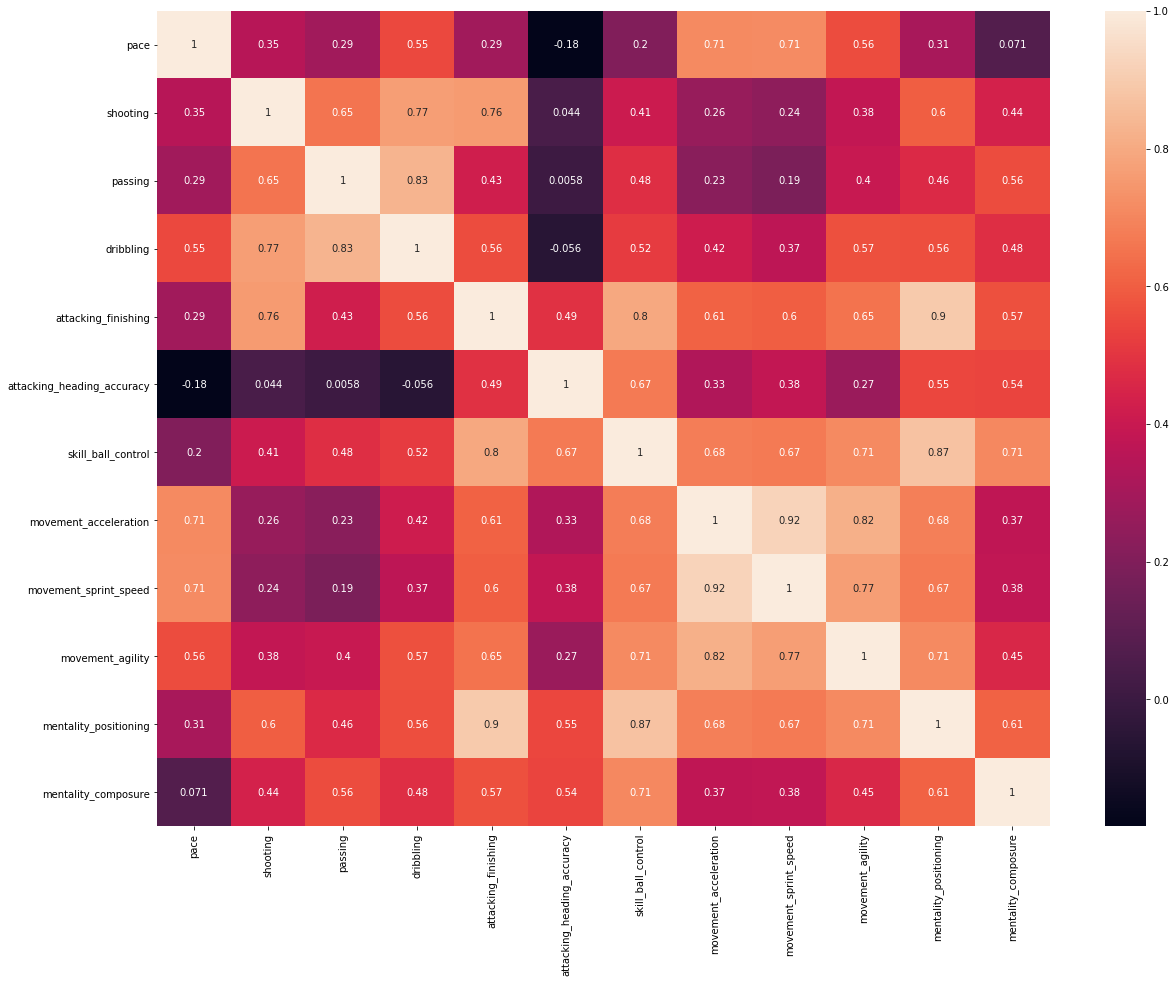

In [7]:
#Print Heatmap to know the Correlation between Column
corr = df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True)

In [8]:
data1 = df[['passing','shooting','dribbling']].copy()
data2 = df[['movement_sprint_speed','movement_acceleration','pace','dribbling']].copy()

In [9]:
type(data2)

pandas.core.frame.DataFrame

In [27]:
#Scaling Data 
from sklearn.preprocessing import StandardScaler
data1 = df[['passing','shooting','dribbling']].copy()
data1[['passing','shooting','dribbling']] = StandardScaler().fit_transform(data1)

data2 = df[['movement_sprint_speed','movement_acceleration','pace','dribbling']].copy()
data2[['movement_sprint_speed','movement_acceleration','pace','dribbling']] = StandardScaler().fit_transform(data2)

In [32]:
# PCA into 2 component
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principal_component = pca.fit_transform(data1)
pca_data = pd.DataFrame(data = principal_component, columns = ['principal_1','principal_2'])

pca_component = pca.fit_transform(data2)
pca_data2 = pd.DataFrame(data = pca_component, columns = ['principal_1','principal_2'])
pca_data2.head()

,principal_1,principal_2
0,-3.924360,-2.091815
1,-3.979562,-1.361402
2,-4.370734,-1.849290
3,0.931160,-0.565870
4,-4.295468,-1.785883


In [12]:
#Finding Mina and Max for Data Problem1
min1 = pca_data['principal_1'].min()
max1 = pca_data['principal_1'].max()
min2 = pca_data['principal_2'].min()
max2 = pca_data['principal_2'].max()

In [34]:
#Finding Mina and Max for Data Problem1
min_1 = pca_data['principal_1'].min()
max_1 = pca_data['principal_1'].max()
min_2 = pca_data['principal_2'].min()
max_2 = pca_data['principal_2'].max()

# Clustering

Using K-Means Clustering for 2 Different Problem

# Problem 1

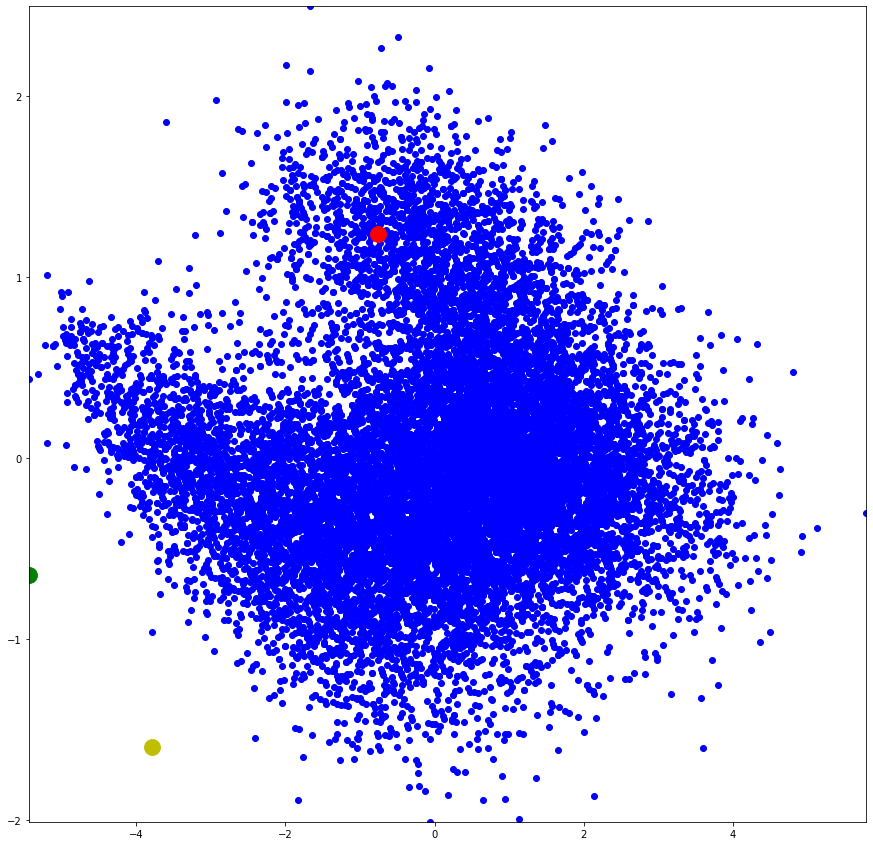

In [13]:
np.random.seed(1)
#Initiate Centroid
k = 3

#Centroid[i] = [x, y]
c = {
    i+1: [np.random.uniform(min1, max1), np.random.uniform(min2, max2)]
    for i in range(k)
}

#Plotting Data
fig = plt.figure(figsize=(15, 15))
plt.scatter(pca_data['principal_1'], pca_data['principal_2'], color='b')
colmap = {1: 'r', 2: 'g', 3: 'y'}

#Plotting Centroid
for i in c.keys():
    plt.scatter(*c[i], color=colmap[i], marker='o' , s=250)
plt.xlim(min1, max1)
plt.ylim(min2, max2)
plt.show()

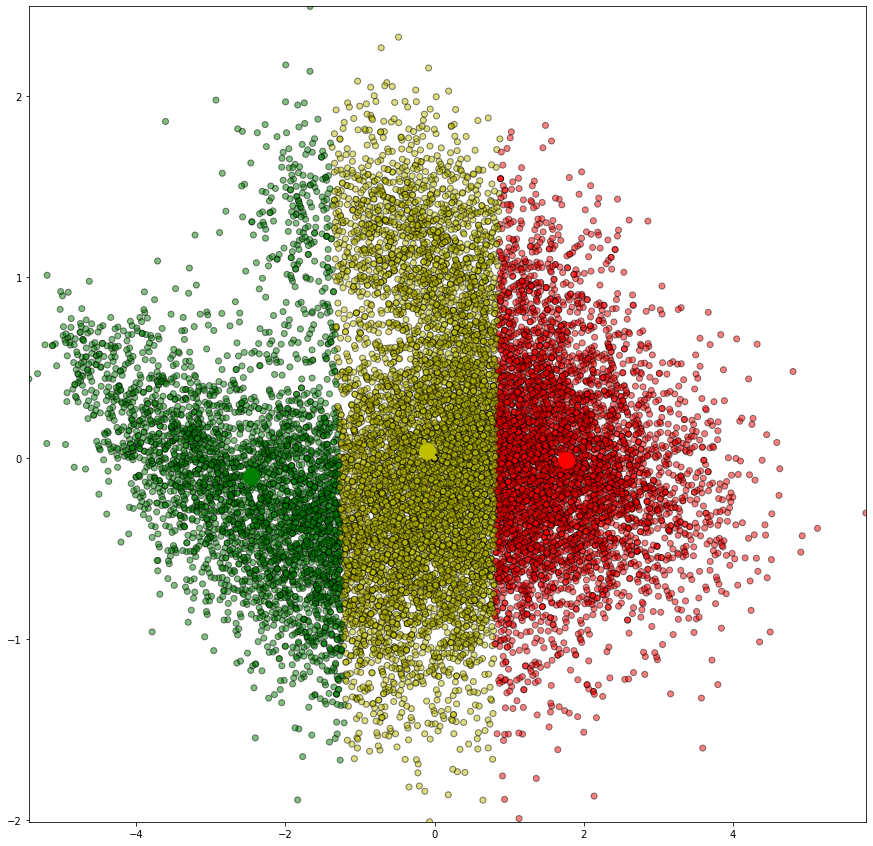

In [24]:
def choosingNeigh(pca, c):
    
    #Calculate The Distance
    for i in c.keys():
        #sqrt((x1 - x2)^2 - (y1 - y2)^2)
        pca_data['distance_{}'.format(i)] = (
            np.sqrt(
                (pca_data['principal_1'] - c[i][0]) ** 2
                + (pca_data['principal_2'] - c[i][1]) ** 2
            )
        )
    #Making new column and assign it with distance and color base on centroid
    centroid_distance = ['distance_{}'.format(i) for i in c.keys()]
    pca_data['Nearest'] = pca_data.loc[:, centroid_distance].idxmin(axis=1)
    pca_data['Nearest'] = pca_data['Nearest'].map(lambda x: int(x.lstrip('distance_')))
    pca_data['color'] = pca_data['Nearest'].map(lambda x: colmap[x])
    return pca_data

pca_data = choosingNeigh(pca_data, c)

#Plotting Data
fig = plt.figure(figsize=(15, 15))
plt.scatter(pca_data['principal_1'], pca_data['principal_2'], color = pca_data['color'], alpha=0.5, edgecolor='k')

#Plotting Centroid
for i in c.keys():
    plt.scatter(*c[i], color=colmap[i], marker='o' , s=250)
plt.xlim(min1, max1)
plt.ylim(min2, max2)
plt.show()

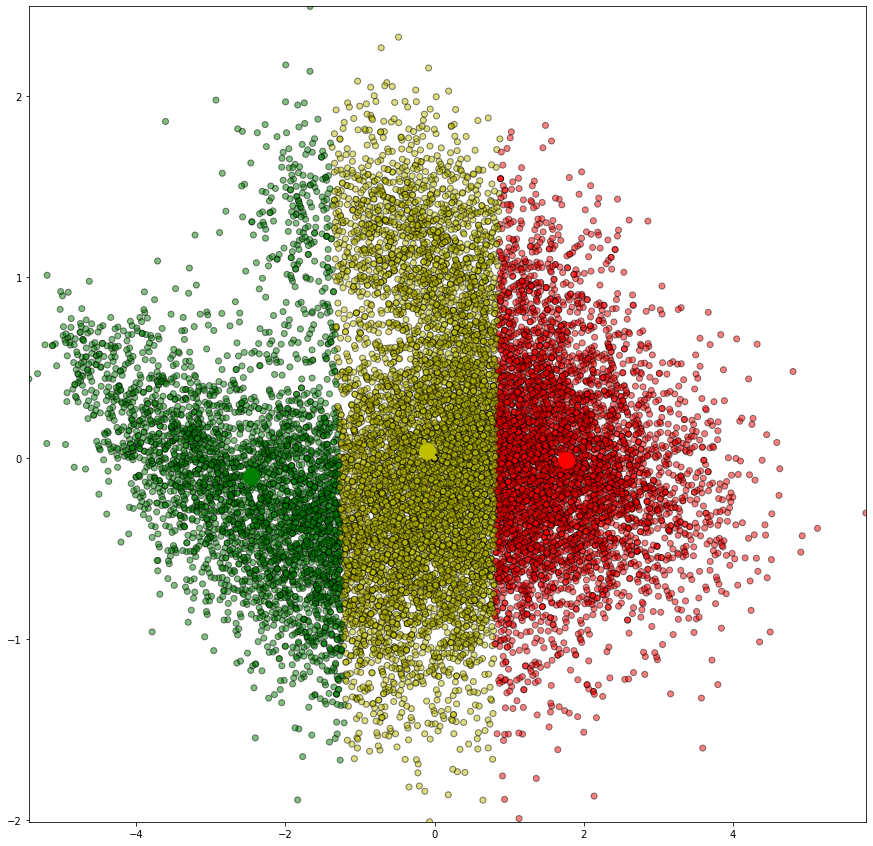

In [25]:
#Copying Centroid into new Variable
old_centroid = copy.deepcopy(c)

#Make Function to Update Centroid
def update(k):
    for i in c.keys():
        c[i][0] = np.mean(pca_data[pca_data['Nearest'] == i]['principal_1'])
        c[i][1] = np.mean(pca_data[pca_data['Nearest'] == i]['principal_2'])
    return k

c = update(c)

#Plotting Data
fig = plt.figure(figsize=(15, 15))
plt.scatter(pca_data['principal_1'], pca_data['principal_2'], color=pca_data['color'], alpha=0.5, edgecolor='k')

#Plotting Centroid
for i in c.keys():
    plt.scatter(*c[i], color=colmap[i],marker='o' , s=250)
plt.xlim(min1, max1)
plt.ylim(min2, max2)

for i in old_centroid.keys():
    old_x = old_centroid[i][0]
    old_y = old_centroid[i][1]
    dx = (c[i][0] - old_centroid[i][0]) * 0.75
    dy = (c[i][1] - old_centroid[i][1]) * 0.75
plt.show()

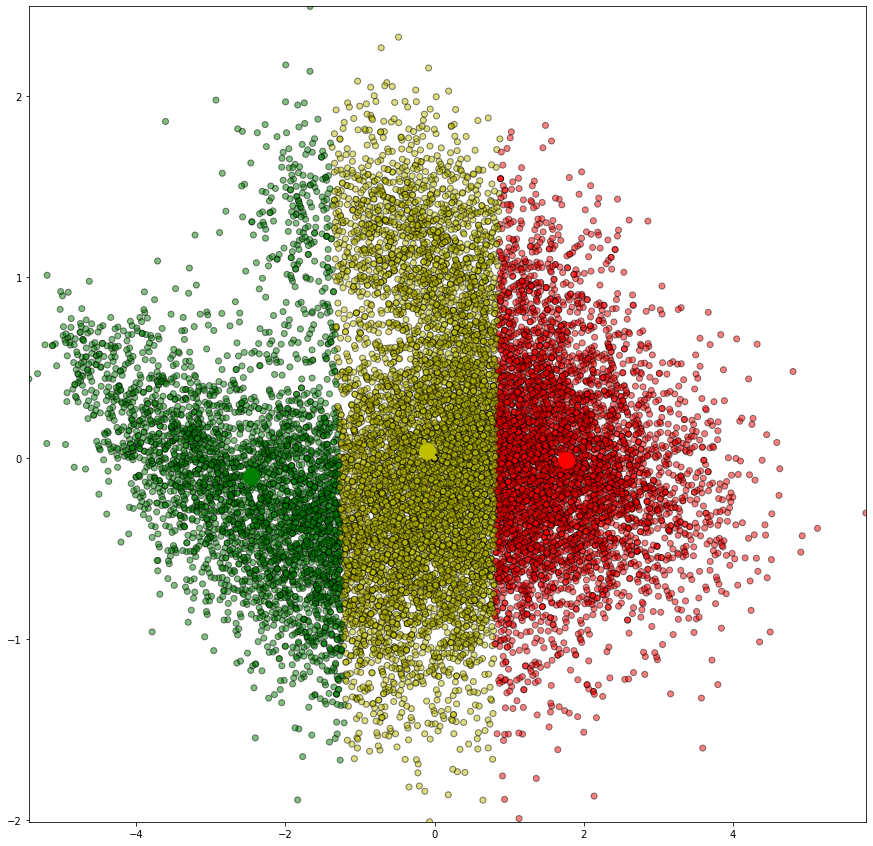

In [26]:
# Continue until all assigned categories don't change any more
while True:
    nearest_centroids = pca_data['Nearest'].copy(deep=True)
    c = update(c)
    pca_data = choosingNeigh(pca_data, c)
    if nearest_centroids.equals(pca_data['Nearest']):
        break

fig = plt.figure(figsize=(15, 15))
plt.scatter(pca_data['principal_1'], pca_data['principal_2'], color=pca_data['color'], alpha=0.5, edgecolor='k')
for i in c.keys():
    plt.scatter(*c[i], color=colmap[i], marker='o' , s=250)
plt.xlim(min1, max1)
plt.ylim(min2, max2)
plt.show()

# Problem 2

In [ ]:
np.random.seed(1)
#Initiate Centroid
k = 3

#Centroid[i] = [x, y]
c = {
    i+1: [np.random.uniform(min1, max1), np.random.uniform(min2, max2)]
    for i in range(k)
}

#Plotting Data
fig = plt.figure(figsize=(15, 15))
plt.scatter(pca_data['principal_1'], pca_data['principal_2'], color='b')
colmap = {1: 'r', 2: 'g', 3: 'y'}

#Plotting Centroid
for i in c.keys():
    plt.scatter(*c[i], color=colmap[i], marker='o' , s=250)
plt.xlim(min1, max1)
plt.ylim(min2, max2)
plt.show()

# Evaluation

Using Elbow Method to Evaluate